In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
data = pd.read_csv("C:/Users/Dell/Desktop/Applied ML/Project/Mental_Health_Care_in_the_Last_4_Weeks.csv")
data.info

<bound method DataFrame.info of                                                Indicator              Group  \
0      Took Prescription Medication for Mental Health...  National Estimate   
1      Took Prescription Medication for Mental Health...             By Age   
2      Took Prescription Medication for Mental Health...             By Age   
3      Took Prescription Medication for Mental Health...             By Age   
4      Took Prescription Medication for Mental Health...             By Age   
...                                                  ...                ...   
10399  Needed Counseling or Therapy But Did Not Get I...           By State   
10400  Needed Counseling or Therapy But Did Not Get I...           By State   
10401  Needed Counseling or Therapy But Did Not Get I...           By State   
10402  Needed Counseling or Therapy But Did Not Get I...           By State   
10403  Needed Counseling or Therapy But Did Not Get I...           By State   

               Stat

In [3]:
data.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [4]:
# To check the NaN values 
print(data.isna().sum())

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64


In [5]:
data.describe()

,Time Period,Value,LowCI,HighCI,Suppression Flag
count,10404.000000,9914.000000,9914.000000,9914.000000,22.0
mean,28.134948,17.450736,14.771565,20.475661,1.0
std,11.040210,8.270565,7.659396,9.052521,0.0
min,1.000000,1.400000,0.800000,2.000000,1.0
25%,20.000000,10.300000,8.000000,12.900000,1.0
50%,29.000000,16.200000,13.900000,19.200000,1.0
75%,37.000000,24.000000,20.800000,27.400000,1.0
max,45.000000,62.900000,53.200000,71.900000,1.0


In [6]:
data.duplicated().sum()

0

In [7]:
data['Value'].fillna(data['Value'].mean(), inplace=True)
data['LowCI'].fillna(data['LowCI'].mean(), inplace=True)
data['HighCI'].fillna(data['HighCI'].mean(), inplace=True)

In [8]:
data['Quartile Range'].fillna(data['Quartile Range'].mode()[0], inplace=True)
data['Confidence Interval'] = data['LowCI'].astype(str) + " - " + data['HighCI'].astype(str)

In [9]:
data.drop(columns=['Suppression Flag'], inplace=True)

In [10]:
# To check the NaN values 
print(data.isna().sum())

Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
LowCI                     0
HighCI                    0
Confidence Interval       0
Quartile Range            0
dtype: int64


In [11]:
data.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,9.8-11.2
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,9.8-11.2
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,9.8-11.2
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,9.8-11.2
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,9.8-11.2


In [12]:
# Creating the list of categorical and numerical columns
# Categorical variables:
cat_cols = data.select_dtypes(include = ['object', 'category']).columns.to_list()
print("Categorical Columns: ",cat_cols)

# Numerical variables:
num_cols = data.select_dtypes(include = ['float', 'int']).columns.to_list()
print("Numerical Columns: ",num_cols)

Categorical Columns:  ['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period Label', 'Time Period Start Date', 'Time Period End Date', 'Confidence Interval', 'Quartile Range']
Numerical Columns:  ['Time Period', 'Value', 'LowCI', 'HighCI']


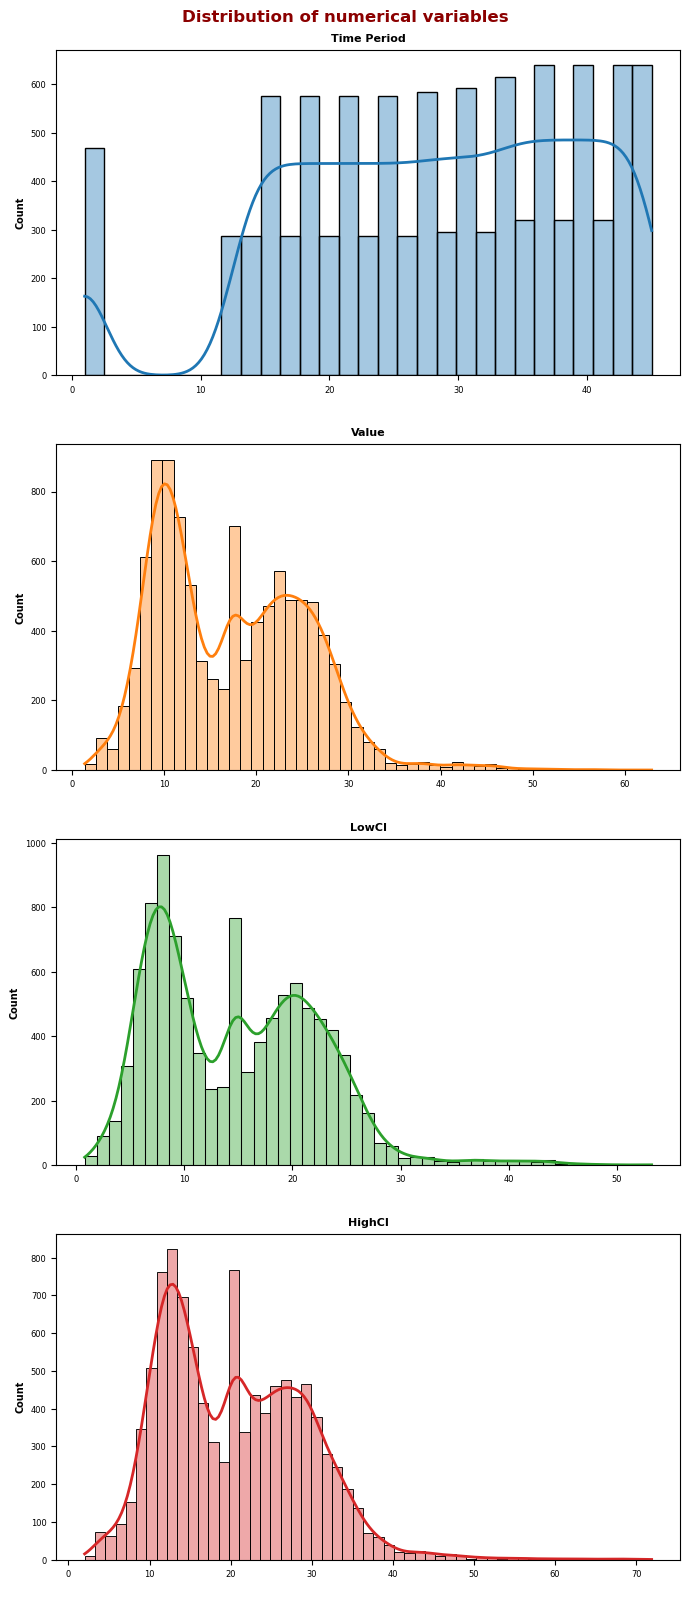

In [13]:
# Plotting the Numerical columns
fig,axes = plt.subplots(5, 1, figsize = (7, 20))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(data,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
  axes[i].tick_params(labelsize = 6)


fig.delaxes(axes[4])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

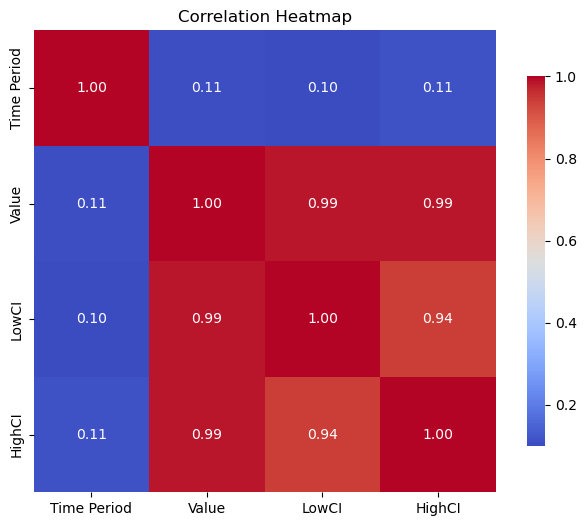

In [14]:
# Calculate correlation matrix
numerical_cols = data[['Time Period', 'Value', 'LowCI', 'HighCI']]
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Find unique values in the Categorical columns
unique_indicator = data['Indicator'].unique()
print("Unique Indicator:", unique_indicator)
unique_group = data['Group'].unique()
print("Unique Group:", unique_group)
unique_state = data['State'].unique()
print("Unique State:", unique_state)
unique_subgroups = data['Subgroup'].unique()
print("Unique Subgroups:", unique_subgroups)
unique_phase = data['Phase'].unique()
print("Unique Phase:", unique_phase)
unique_ci = data['Confidence Interval'].unique()
print("Unique Confidence Interval:", unique_ci)
unique_qr = data['Quartile Range'].unique()
print("Unique Quartile Range:", unique_qr)

Unique Indicator: ['Took Prescription Medication for Mental Health, Last 4 Weeks'
 'Received Counseling or Therapy, Last 4 Weeks'
 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'
 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
Unique Group: ['National Estimate' 'By Age' 'By Sex'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State'
 'By Disability status' 'By Gender identity' 'By Sexual orientation']
Unique State: ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pe

In [16]:
# Identify categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

# Applying Chi-squared test on each pair of categorical columns
results = []

for col1, col2 in combinations(cat_cols, 2):
    # Create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Apply Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the result
    results.append({
        'Variable 1': col1,
        'Variable 2': col2,
        'Chi-squared Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })

# Converting results to a DataFrame
chi_squared_results = pd.DataFrame(results)

# Filter for significant results 
alpha = 0.05
significant_results = chi_squared_results[chi_squared_results['p-value'] < alpha]

# Printing significant associations
print("Significant Chi-squared test results (p < 0.05):")
print(significant_results)

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period Label',
       'Time Period Start Date', 'Time Period End Date', 'Confidence Interval',
       'Quartile Range'],
      dtype='object')
Significant Chi-squared test results (p < 0.05):
                Variable 1              Variable 2  Chi-squared Statistic  \
7                Indicator     Confidence Interval           2.535727e+04   
8                Indicator          Quartile Range           1.960501e+04   
9                    Group                   State           1.040400e+04   
10                   Group                Subgroup           9.363600e+04   
11                   Group                   Phase           1.482801e+03   
12                   Group       Time Period Label           1.668711e+03   
13                   Group  Time Period Start Date           1.668711e+03   
14                   Group    Time Period End Date           1.668711e+03   
15                   Group     Confidence Interval

In [17]:
#pip install sweetviz

In [18]:
import sweetviz as sv

# Create a report
report = sv.analyze(data)

# Show the report
report.show_html("sweetviz_report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
# Inspect unique values in Group and Subgroup
print("Unique values in Group:\n", data['Group'].unique())
print("\nUnique values in Subgroup:\n", data['Subgroup'].unique())

# Cross-tabulate Group and Subgroup
group_subgroup_relation = pd.crosstab(data['Group'], data['Subgroup'])
print("\nGroup-Subgroup Relationship:\n", group_subgroup_relation)

Unique values in Group:
 ['National Estimate' 'By Age' 'By Sex'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State'
 'By Disability status' 'By Gender identity' 'By Sexual orientation']

Unique values in Subgroup:
 ['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female'
 'Did not experience symptoms of anxiety/depression in the past 4 weeks'
 'Experienced symptoms of anxiety/depression in past 4 weeks'
 'Hispanic or Latino' 'Non-Hispanic White, single race'
 'Non-Hispanic Black, single race' 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher" 'Alabama'
 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 

In [20]:
# Check class balance for 'Subgroup' (demographic subgroup)
# Set display options to show all rows
pd.set_option('display.max_rows', None)  
subgroup_counts = data['Subgroup'].value_counts()
print("Subgroup Class Balance:\n", subgroup_counts)

Subgroup Class Balance:
 Subgroup
United States                                                            152
Experienced symptoms of anxiety/depression in past 4 weeks               152
18 - 29 years                                                            152
Bachelor's degree or higher                                              152
Some college/Associate's degree                                          152
High school diploma or GED                                               152
Less than a high school diploma                                          152
Non-Hispanic Asian, single race                                          152
Non-Hispanic Black, single race                                          152
Non-Hispanic White, single race                                          152
Hispanic or Latino                                                       152
Non-Hispanic, other races and multiple races                             152
Did not experience symptoms of anxiety/dep

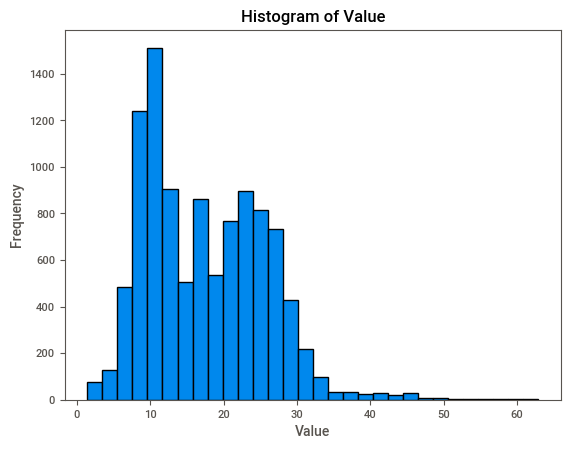

In [21]:
# Plot histogram for checking distribution of data
plt.hist(data['Value'], bins=30, edgecolor='black')
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [22]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_value = shapiro(data['Value'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# If p-value < 0.05, the data is not normally distributed
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

Shapiro-Wilk Test Statistic: 0.9527092653778821
P-value: 2.1325044174466455e-49
The data is not normally distributed.


In [23]:
# Defining the Usage_Category column on basis of Value column using Qunatile binning
from sklearn.preprocessing import KBinsDiscretizer
# Initialize the KBinsDiscretizer with quantile strategy
# Set n_bins to the number of desired bins (e.g., 5 or 10)
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Step 2: Apply quantile binning
data['Usage_Category'] = pd.qcut(data['Value'], q=num_bins, labels=bin_labels)

# Step 3: Verify the distribution of the new Usage_Category column
print("Usage Category Distribution After Quantile Binning:\n", data['Usage_Category'].value_counts())
print("\nBinned Data with Usage_Category:\n", data[['Value', 'Usage_Category']])

Usage Category Distribution After Quantile Binning:
 Usage_Category
Low       3495
High      3464
Medium    3445
Name: count, dtype: int64

Binned Data with Usage_Category:
            Value Usage_Category
0      19.400000         Medium
1      18.700000         Medium
2      18.300000         Medium
3      20.400000         Medium
4      21.200000         Medium
5      19.700000         Medium
6      18.400000         Medium
7      13.800000         Medium
8      13.700000         Medium
9      24.600000           High
10     11.600000            Low
11     33.000000           High
12     13.800000         Medium
13     22.500000           High
14     12.600000         Medium
15      8.100000            Low
16     22.100000           High
17     17.400000         Medium
18     18.100000         Medium
19     21.000000         Medium
20     19.400000         Medium
21     22.300000           High
22     16.700000         Medium
23     18.300000         Medium
24     24.100000          

In [24]:
# Check class balance for 'Usage_Category'
usage_category_counts = data['Usage_Category'].value_counts()
print("Usage Category Class Balance:\n", usage_category_counts)

Usage Category Class Balance:
 Usage_Category
Low       3495
High      3464
Medium    3445
Name: count, dtype: int64


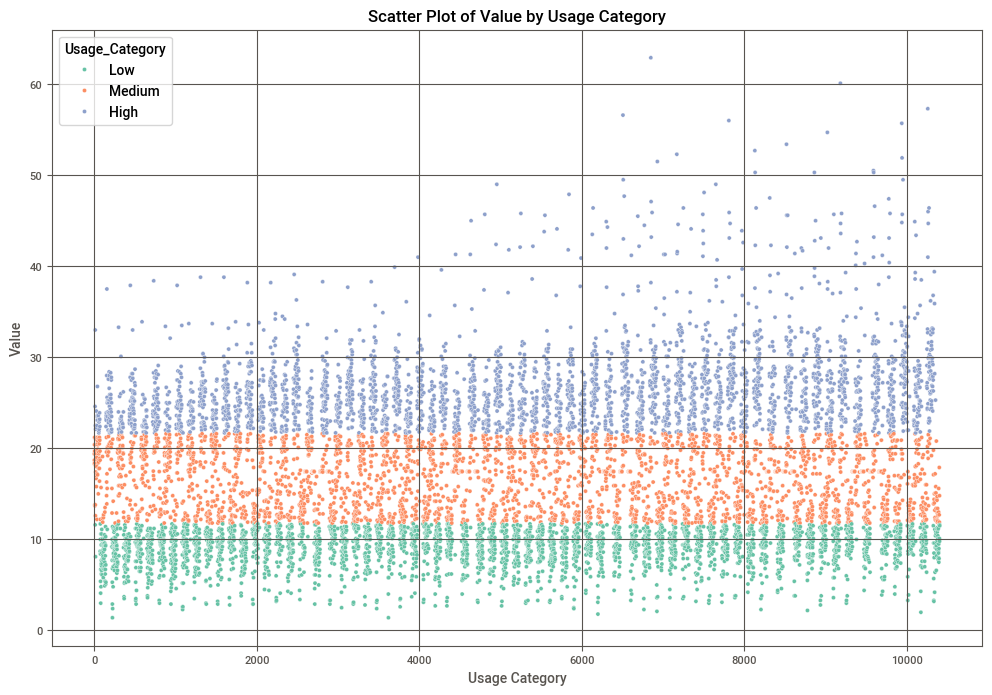

In [25]:
# Scatter Plot
plt.figure(figsize=(12, 8))
#sns.scatterplot(x='Usage_Category', y='Value', data=data, s=100, color='g')
sns.scatterplot(x=data.index, y='Value', hue='Usage_Category', data=data, palette='Set2')
plt.title("Scatter Plot of Value by Usage Category")
plt.xlabel("Usage Category")
plt.ylabel("Value")
plt.grid(True)
plt.show()

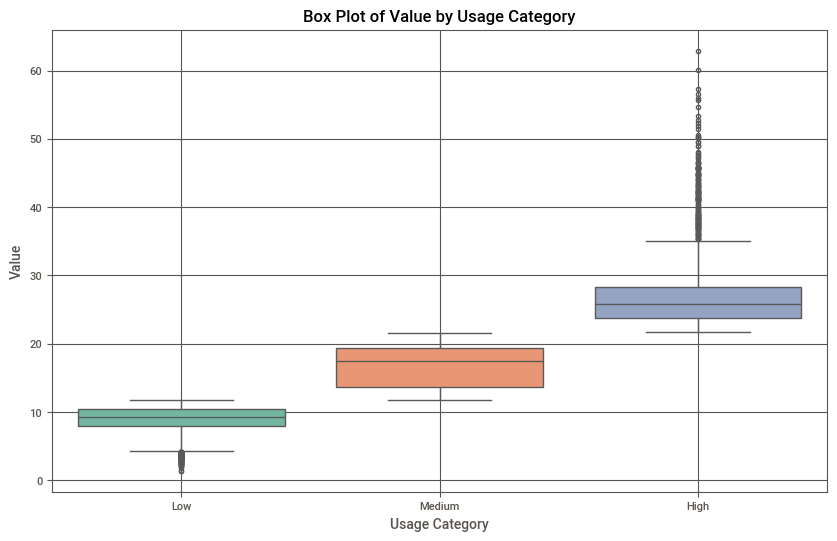

In [26]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Usage_Category', y='Value', data=data, palette="Set2")
plt.title("Box Plot of Value by Usage Category")
plt.xlabel("Usage Category")
plt.ylabel("Value")
plt.grid(True)
plt.show()

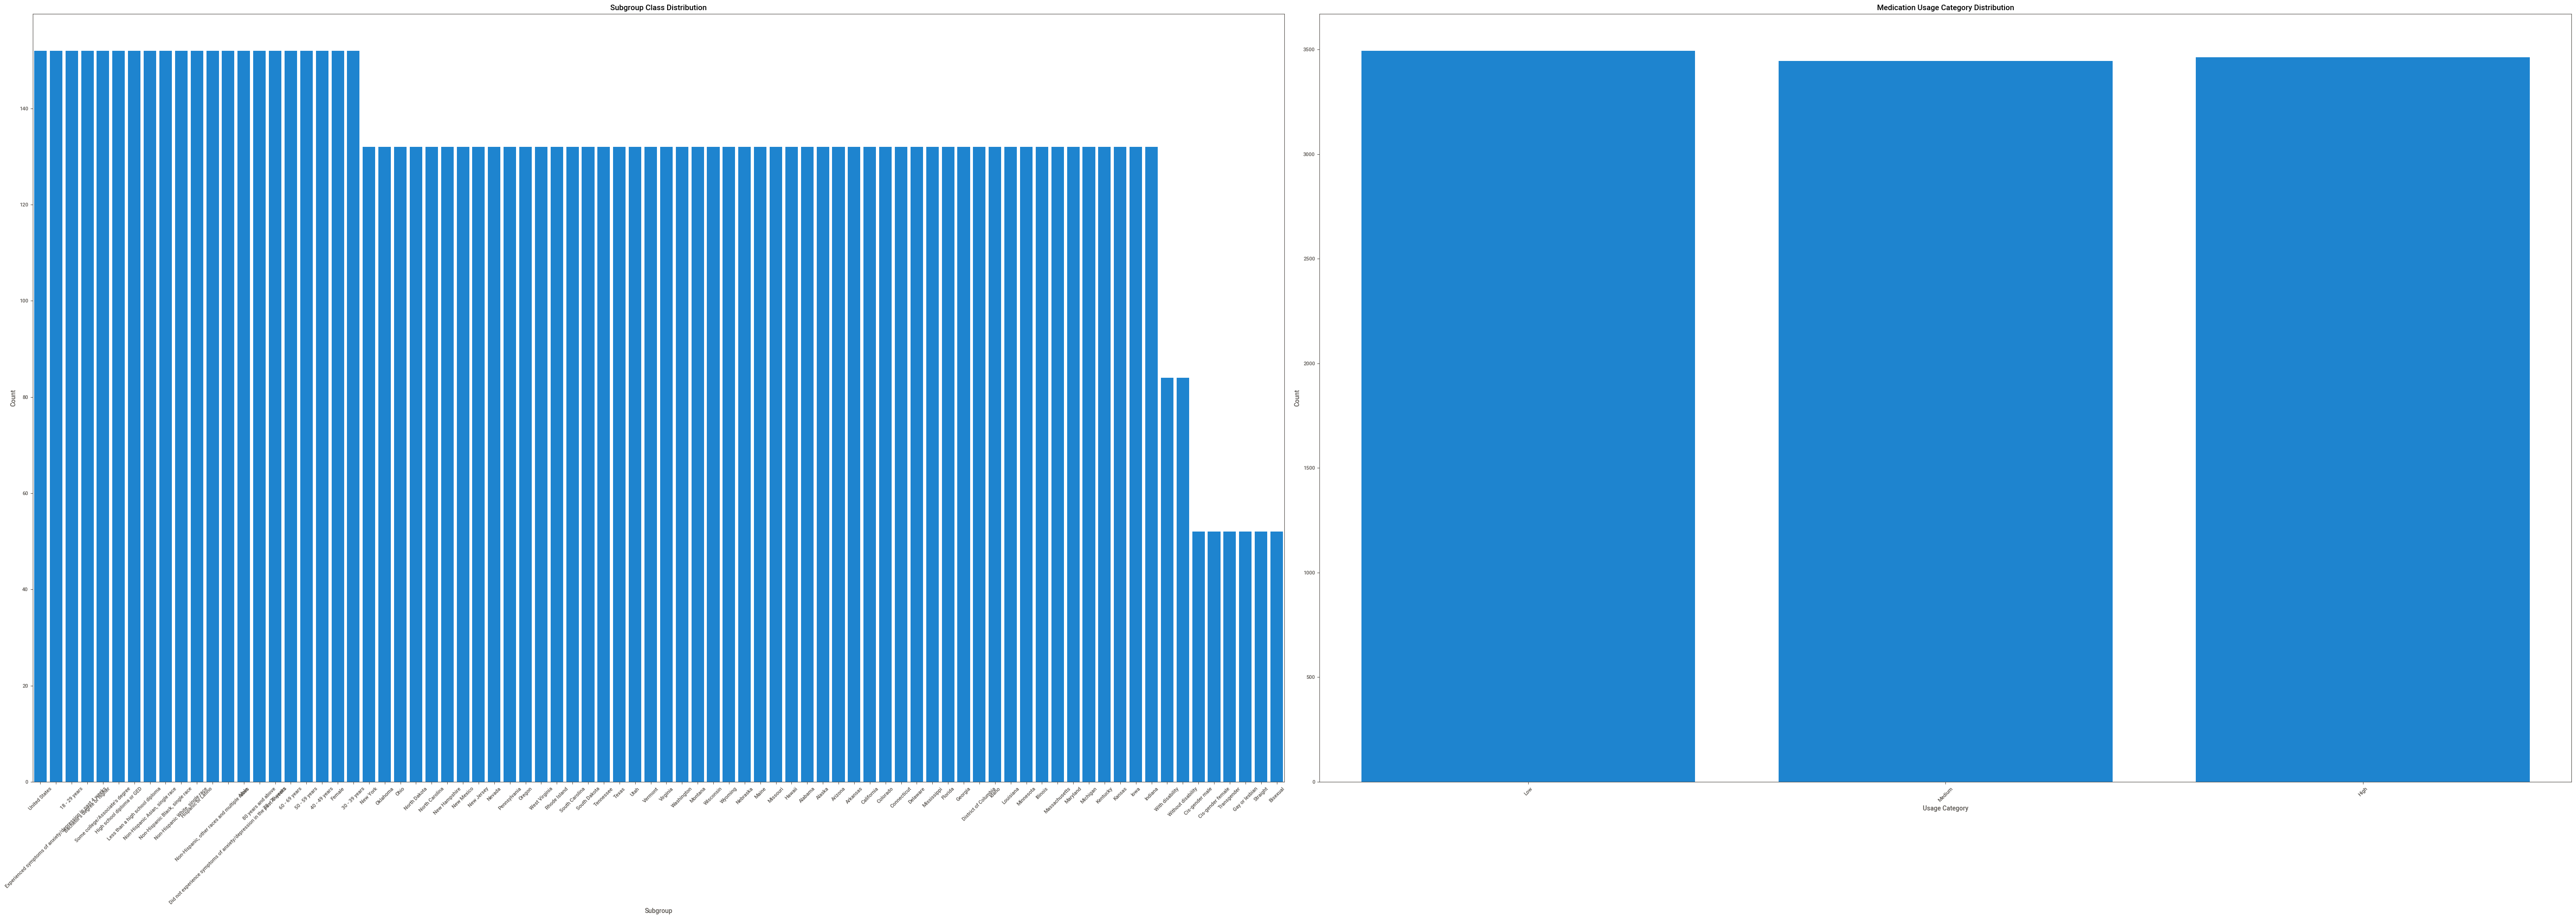

In [27]:
# Visualize the distributions
fig, axes = plt.subplots(1, 2, figsize=(56, 20))
sns.barplot(x=subgroup_counts.index, y=subgroup_counts.values, ax=axes[0])
axes[0].set_title('Subgroup Class Distribution')
axes[0].set_xlabel('Subgroup')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=usage_category_counts.index, y=usage_category_counts.values, ax=axes[1])
axes[1].set_title('Medication Usage Category Distribution')
axes[1].set_xlabel('Usage Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

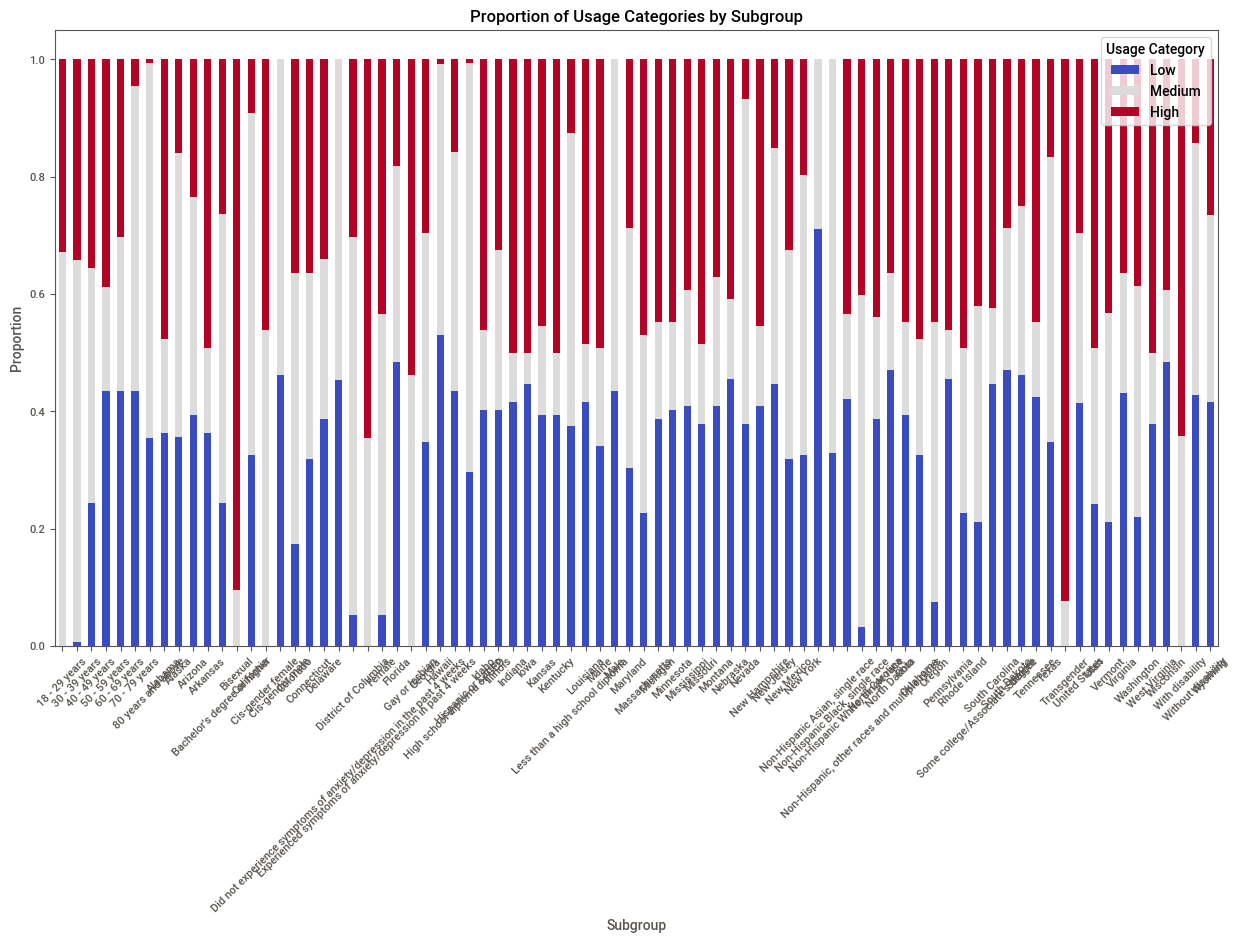

In [28]:
# Calculate proportions
proportions = data.groupby(['Subgroup', 'Usage_Category']).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0)  # Convert to proportions

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='coolwarm')
plt.title('Proportion of Usage Categories by Subgroup')
plt.xlabel('Subgroup')
plt.ylabel('Proportion')
plt.legend(title='Usage Category')
plt.xticks(rotation=45)
plt.show()

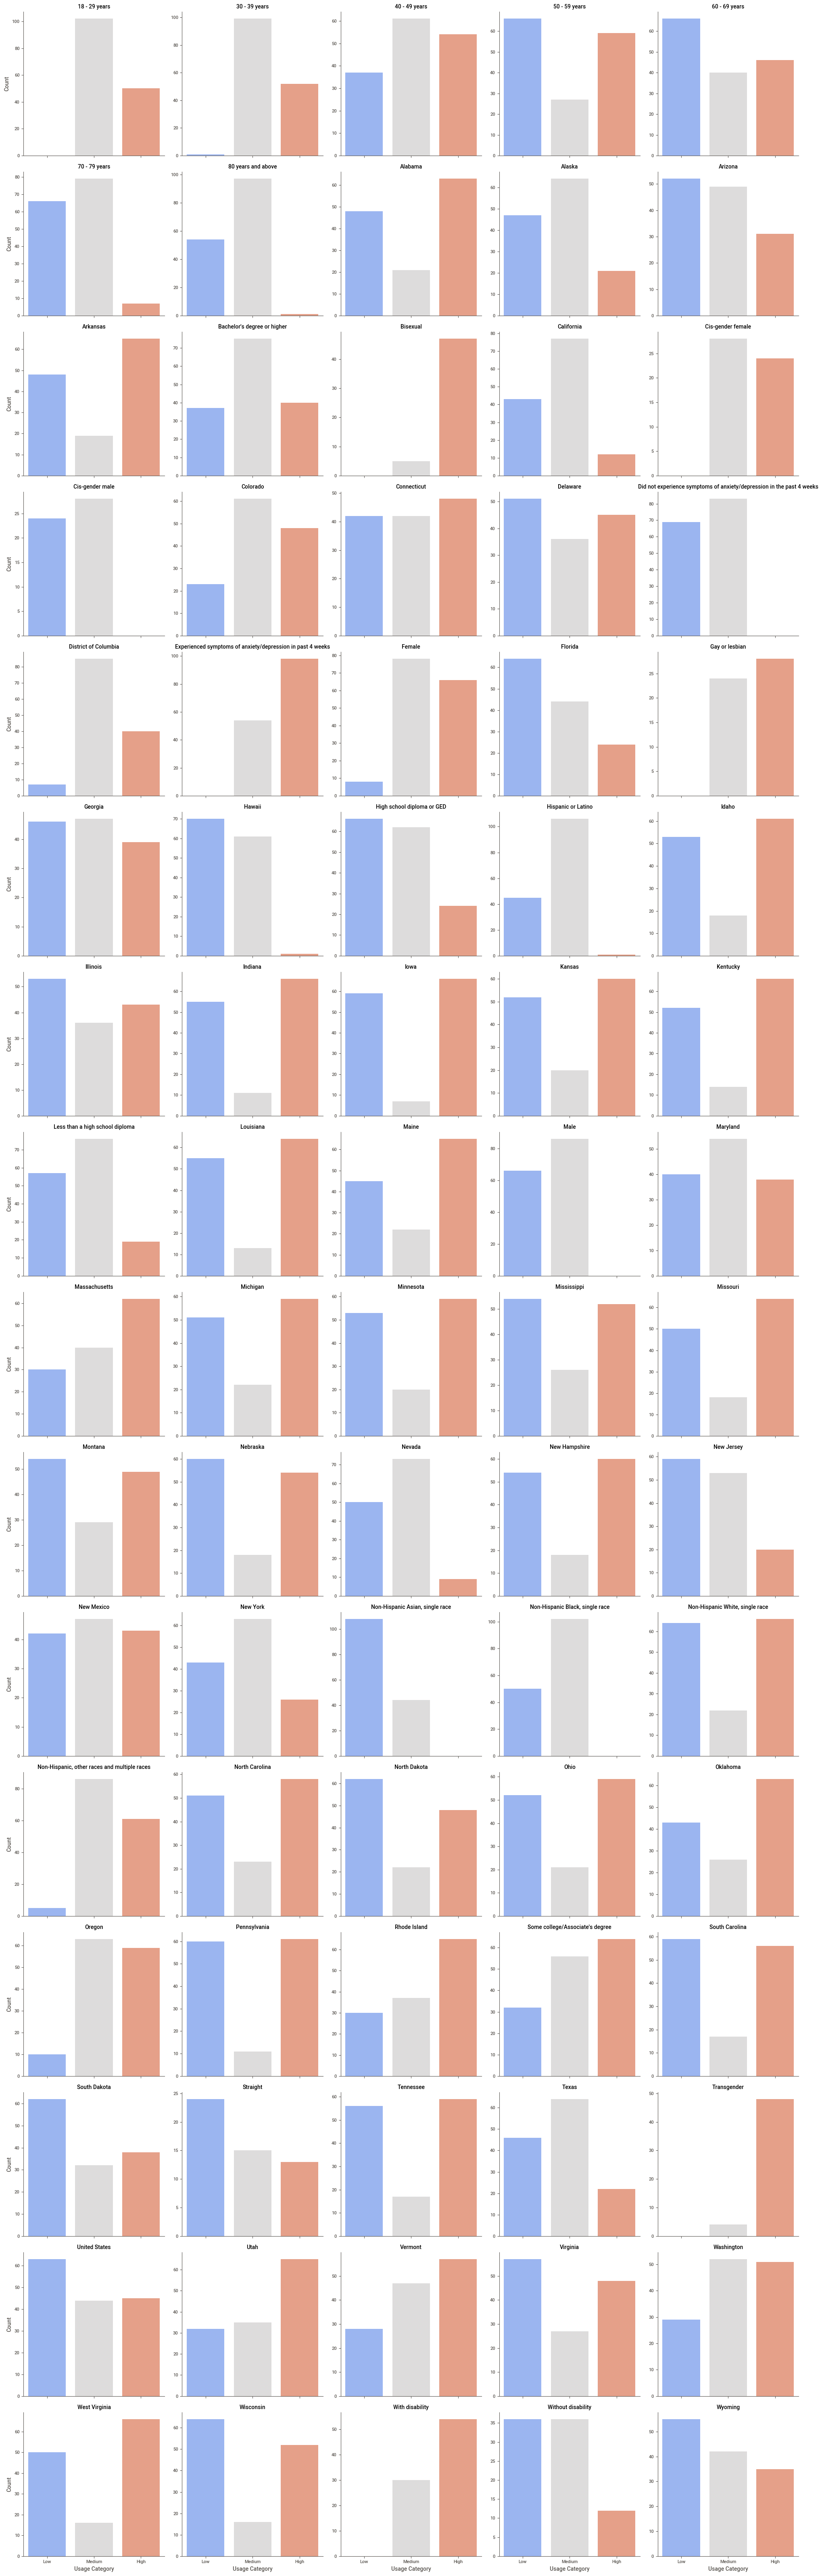

In [29]:
# Group by Subgroup and Usage_Category and calculate counts
category_counts = data.groupby(['Subgroup', 'Usage_Category']).size().reset_index(name='Count')

# Use the dataframe with counts
g = sns.FacetGrid(category_counts, col="Subgroup", col_wrap=5, height=4, sharey=False)
g.map(sns.barplot, "Usage_Category", "Count", order=["Low", "Medium", "High"], palette="coolwarm")

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Usage Category", "Count")
plt.show()

In [30]:
# Check class balance for 'Demographic_Profile'
group_counts = data['Group'].value_counts()
print("Group Class Balance:\n", group_counts)

Group Class Balance:
 Group
By State                                         6732
By Age                                           1064
By Race/Hispanic ethnicity                        760
By Education                                      608
By Sex                                            304
By Presence of Symptoms of Anxiety/Depression     304
By Disability status                              168
By Gender identity                                156
By Sexual orientation                             156
National Estimate                                 152
Name: count, dtype: int64


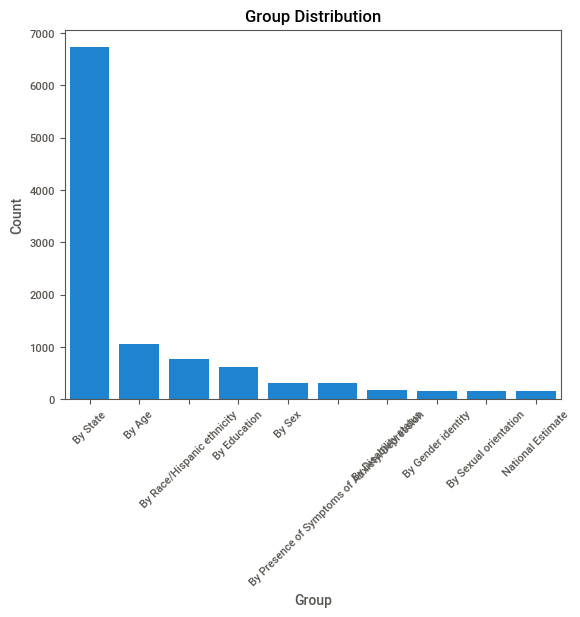

In [31]:
# Visualize the class distribution
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.title('Group Distribution')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
# On the basis of the above found association between the columns

# Dropping the columns "Time Period Start Date", "Time Period End Date" and Confidence Interval 
data_reduced = data.drop(columns=["Time Period Start Date", "Time Period End Date", "Confidence Interval"])
print(data_reduced.columns)

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Value', 'LowCI', 'HighCI', 'Quartile Range',
       'Usage_Category'],
      dtype='object')


In [33]:
data_reduced.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Value,LowCI,HighCI,Quartile Range,Usage_Category
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",19.4,19.0,19.8,9.8-11.2,Medium
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",18.7,17.2,20.3,9.8-11.2,Medium
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",18.3,17.3,19.2,9.8-11.2,Medium
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",20.4,19.5,21.3,9.8-11.2,Medium
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",21.2,20.2,22.2,9.8-11.2,Medium


In [34]:
data_reduced.to_csv("project_eda.csv", index=False)

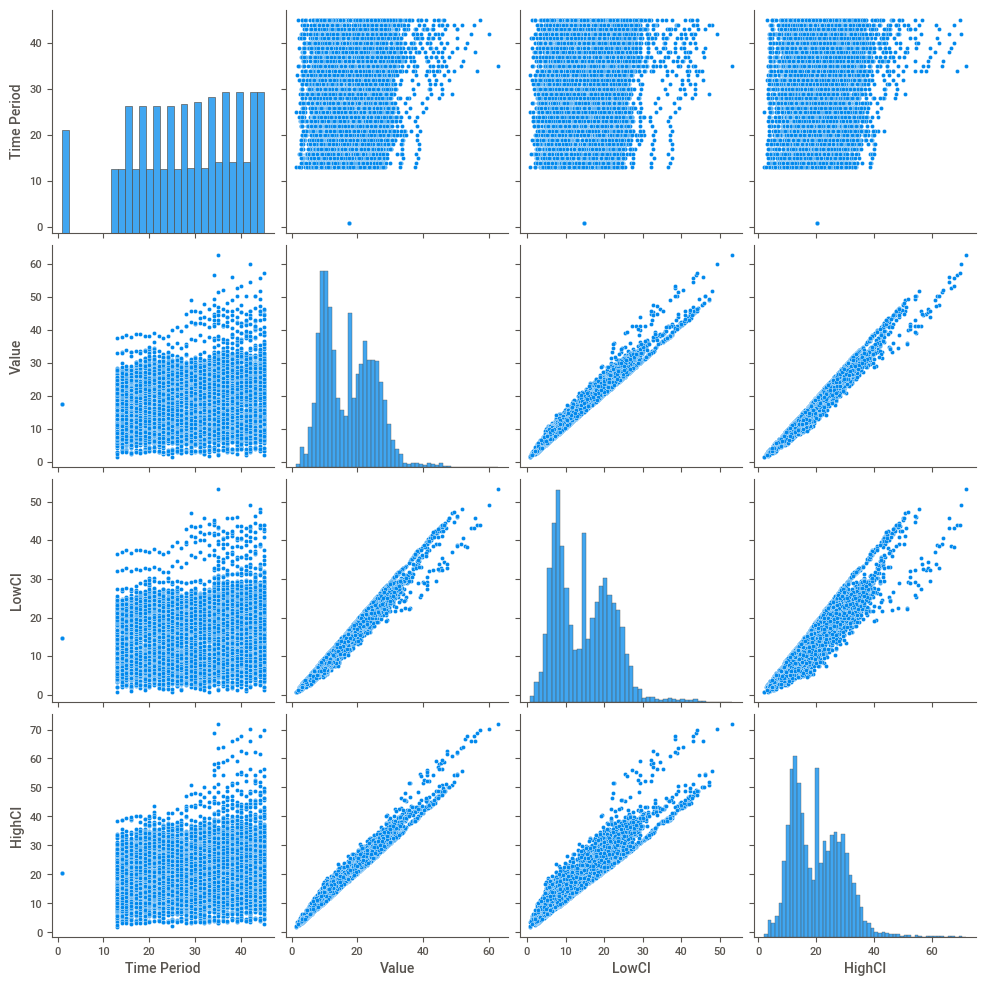

In [35]:
sns.pairplot(data[['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period Label', 'Quartile Range', 'Time Period', 'Value', 'LowCI', 'HighCI', 'Usage_Category']])  # Replace 'x1', 'x2', 'x3' with actual feature columns
plt.show()